In [1]:
setwd('D:/Workspace/R/data')

In [2]:
library(dplyr)
library(ggplot2)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [3]:
df = read.csv('sale_data.csv')

In [4]:
head(df)

X,YM,CATEGORY,ITEM_CNT,QTY,PRICE,MAXTEMP,SALEDAY,RAIN_DAY,HOLIDAY
1,200901,과즙음료,45,990,2611,4,126753,151,12
2,200902,과즙음료,45,1199,2689,9,113399,3014,8
3,200903,과즙음료,43,1102,2735,12,129162,1383,9
4,200904,과즙음료,42,1326,2807,19,126277,3564,8
5,200905,과즙음료,46,1672,2674,25,129584,9288,12
6,200906,과즙음료,48,1875,2777,27,123218,9998,8


In [5]:
summary(df)

       X                YM               CATEGORY     ITEM_CNT    
 Min.   :  1.00   Min.   :200901   과즙음료  :60   Min.   : 1.00  
 1st Qu.: 45.75   1st Qu.:201004   비타민음료:60   1st Qu.:14.00  
 Median : 90.50   Median :201107   차음료    :60   Median :43.00  
 Mean   : 90.50   Mean   :201107                   Mean   :39.57  
 3rd Qu.:135.25   3rd Qu.:201209                   3rd Qu.:57.00  
 Max.   :180.00   Max.   :201312                   Max.   :83.00  
      QTY             PRICE         MAXTEMP         SALEDAY      
 Min.   :  27.0   Min.   :1229   Min.   :-1.00   Min.   :113399  
 1st Qu.: 814.5   1st Qu.:1424   1st Qu.: 9.75   1st Qu.:143047  
 Median :1734.0   Median :1762   Median :19.50   Median :179564  
 Mean   :1685.7   Mean   :1915   Mean   :17.55   Mean   :181596  
 3rd Qu.:2387.2   3rd Qu.:2347   3rd Qu.:27.00   3rd Qu.:224721  
 Max.   :3992.0   Max.   :3251   Max.   :31.00   Max.   :245068  
    RAIN_DAY        HOLIDAY    
 Min.   :    0   Min.   : 8.0  
 1st Qu.: 2750   

In [6]:
set.seed(2020)

In [7]:
product1 = df %>% filter(df$CATEGORY == '과즙음료')
product2 = df %>% filter(df$CATEGORY == '비타민음료')
product3 = df %>% filter(df$CATEGORY == '차음료')

idx=length(product1$X)*0.8
print(idx)
product1_train = product1[1:idx, ]
product1_test = product1[idx+1:length(product1$X), ]

product2_train = product2[1:idx, ]
product2_test = product2[idx+1:length(product2$X), ]

product3_train = product3[1:idx, ]
product3_test = product3[idx+1:length(product3$X), ]

[1] 48


In [8]:
product1_train

X,YM,CATEGORY,ITEM_CNT,QTY,PRICE,MAXTEMP,SALEDAY,RAIN_DAY,HOLIDAY
1,200901,과즙음료,45,990,2611,4,126753,151,12
2,200902,과즙음료,45,1199,2689,9,113399,3014,8
3,200903,과즙음료,43,1102,2735,12,129162,1383,9
4,200904,과즙음료,42,1326,2807,19,126277,3564,8
5,200905,과즙음료,46,1672,2674,25,129584,9288,12
6,200906,과즙음료,48,1875,2777,27,123218,9998,8
7,200907,과즙음료,53,1663,2858,28,131083,17405,8
8,200908,과즙음료,52,1957,2886,29,130040,7704,10
9,200909,과즙음료,54,2021,2838,27,131989,4096,8
10,200910,과즙음료,56,1718,2879,22,136095,2824,10


In [9]:
product1_test

,X,YM,CATEGORY,ITEM_CNT,QTY,PRICE,MAXTEMP,SALEDAY,RAIN_DAY,HOLIDAY
49,49,201301,과즙음료,63,1627,2184,2,240416,2528,9
50,50,201302,과즙음료,65,1624,2337,5,217015,6667,9
51,51,201303,과즙음료,63,2103,2376,12,243648,4364,11
52,52,201304,과즙음료,60,2117,2445,15,237340,6727,8
53,53,201305,과즙음료,62,2606,2419,23,245068,17217,10
54,54,201306,과즙음료,56,2621,1962,28,236180,7360,11
55,55,201307,과즙음료,59,2336,1936,29,241687,41344,8
56,56,201308,과즙음료,61,2755,1957,31,240142,22284,10
57,57,201309,과즙음료,59,2992,1928,26,231662,13699,12
58,58,201310,과즙음료,64,2563,1898,21,239981,3011,10


In [10]:
pd1 = lm(QTY~PRICE+MAXTEMP+SALEDAY+RAIN_DAY+HOLIDAY, data=product1_train)
summary(pd1)


Call:
lm(formula = QTY ~ PRICE + MAXTEMP + SALEDAY + RAIN_DAY + HOLIDAY, 
    data = product1_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-508.17 -163.98   15.64  150.88  677.77 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.062e+03  5.967e+02  -5.131 6.96e-06 ***
PRICE        7.290e-01  1.615e-01   4.513 5.09e-05 ***
MAXTEMP      5.333e+01  5.299e+00  10.063 9.30e-13 ***
SALEDAY      1.214e-02  1.125e-03  10.793 1.10e-13 ***
RAIN_DAY    -8.791e-03  5.441e-03  -1.616    0.114    
HOLIDAY      1.855e+01  3.164e+01   0.587    0.561    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 254.1 on 42 degrees of freedom
Multiple R-squared:  0.8685,	Adjusted R-squared:  0.8528 
F-statistic: 55.47 on 5 and 42 DF,  p-value: < 2.2e-16


In [11]:
pd1 = lm(QTY~PRICE+MAXTEMP+SALEDAY, data=product1_train)
summary(pd1)


Call:
lm(formula = QTY ~ PRICE + MAXTEMP + SALEDAY, data = product1_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-495.12 -181.00  -24.53  155.45  729.23 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.954e+03  5.334e+02  -5.537 1.61e-06 ***
PRICE        7.859e-01  1.594e-01   4.929 1.22e-05 ***
MAXTEMP      4.726e+01  3.864e+00  12.232 9.42e-16 ***
SALEDAY      1.177e-02  1.094e-03  10.755 6.74e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 256.8 on 44 degrees of freedom
Multiple R-squared:  0.8593,	Adjusted R-squared:  0.8497 
F-statistic: 89.59 on 3 and 44 DF,  p-value: < 2.2e-16


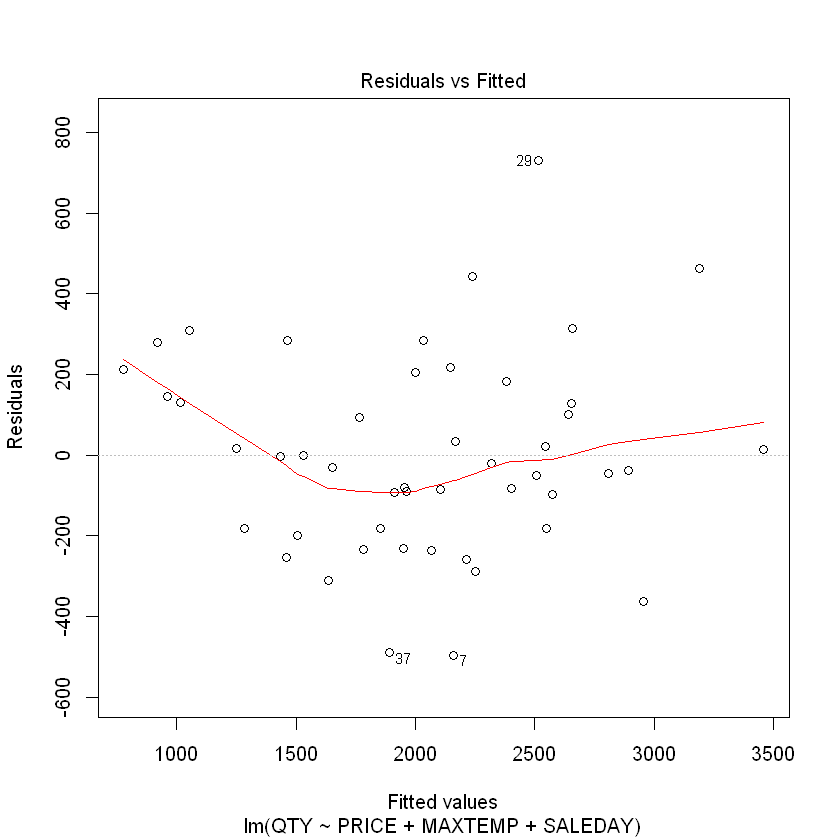

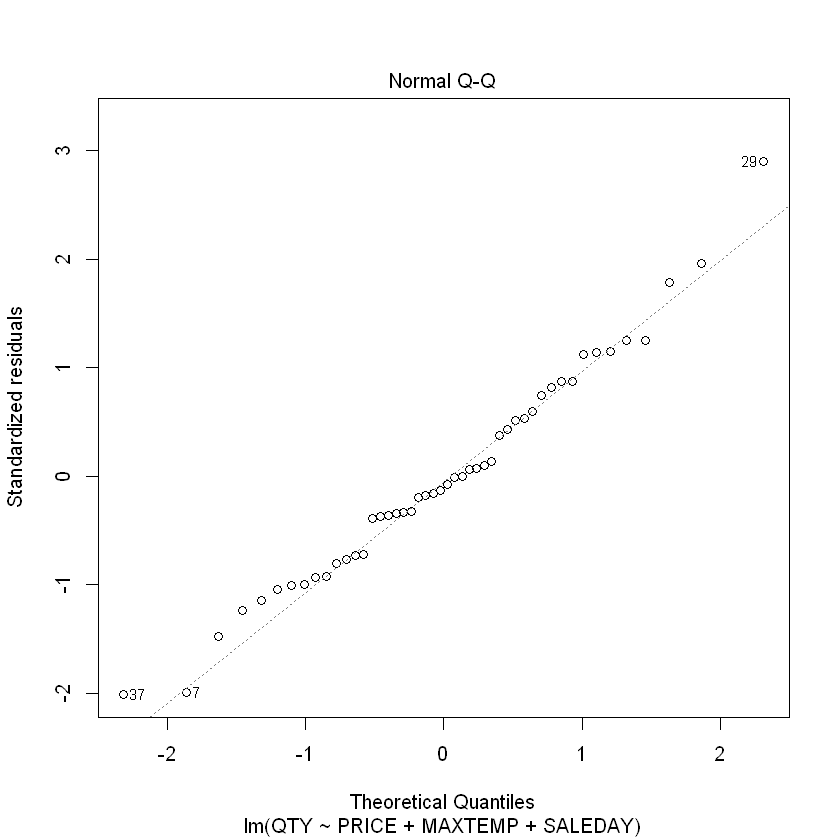

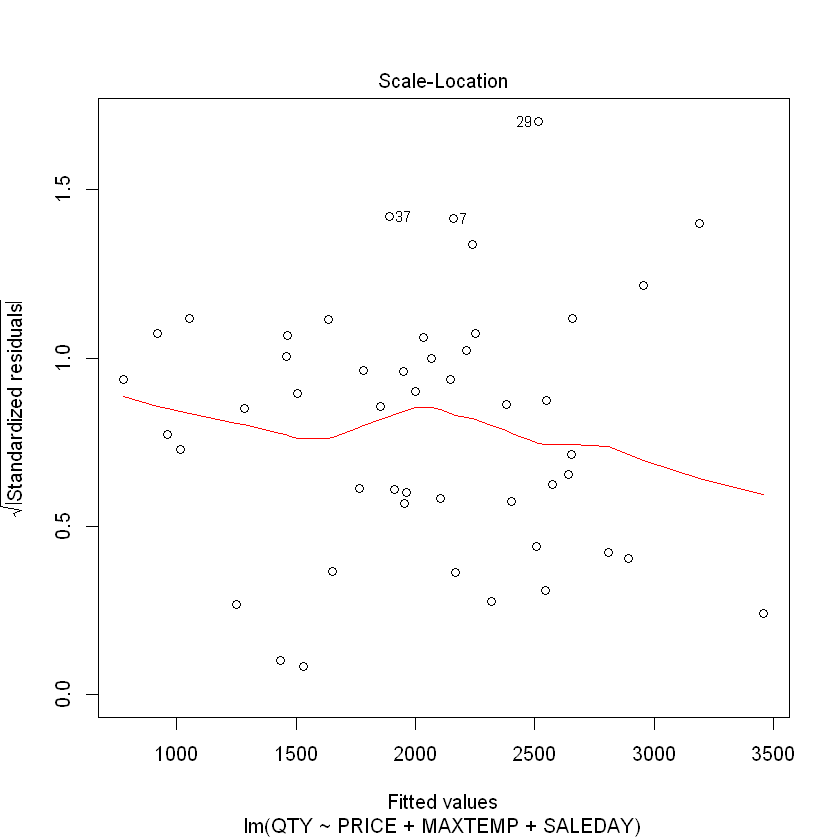

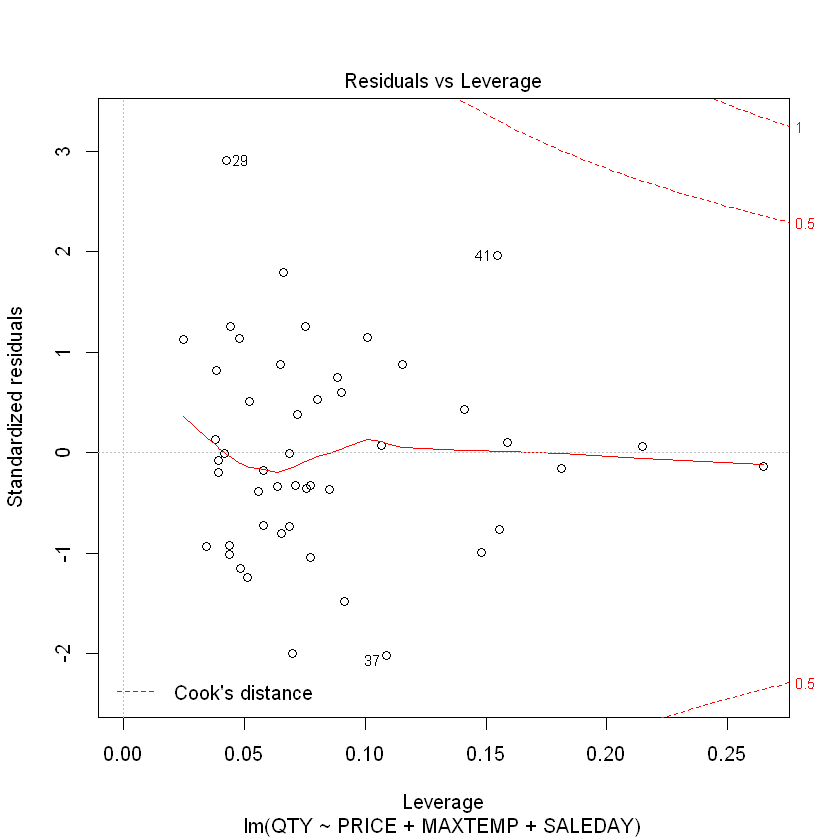

In [12]:
plot(pd1)

In [13]:
pd2 = lm(QTY~PRICE+MAXTEMP+SALEDAY+RAIN_DAY+HOLIDAY, data=product2_train)
summary(pd2)


Call:
lm(formula = QTY ~ PRICE + MAXTEMP + SALEDAY + RAIN_DAY + HOLIDAY, 
    data = product2_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-250.09 -103.78  -31.25   83.01  392.28 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.859e+03  3.022e+02  -6.150 2.42e-07 ***
PRICE        9.775e-01  2.029e-01   4.817 1.92e-05 ***
MAXTEMP      7.320e+00  3.571e+00   2.050   0.0466 *  
SALEDAY      2.376e-03  1.197e-03   1.984   0.0538 .  
RAIN_DAY     6.045e-03  3.573e-03   1.692   0.0981 .  
HOLIDAY      1.713e+01  2.086e+01   0.821   0.4164    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 167.4 on 42 degrees of freedom
Multiple R-squared:  0.804,	Adjusted R-squared:  0.7807 
F-statistic: 34.46 on 5 and 42 DF,  p-value: 7.928e-14


In [14]:
pd2 = lm(QTY~PRICE+MAXTEMP+SALEDAY+RAIN_DAY, data=product2_train)
summary(pd2)


Call:
lm(formula = QTY ~ PRICE + MAXTEMP + SALEDAY + RAIN_DAY, data = product2_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-252.95 -111.98  -36.51   93.58  404.81 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.697e+03  2.283e+02  -7.434 3.05e-09 ***
PRICE        9.684e-01  2.018e-01   4.798 1.96e-05 ***
MAXTEMP      7.103e+00  3.548e+00   2.002   0.0516 .  
SALEDAY      2.484e-03  1.186e-03   2.095   0.0421 *  
RAIN_DAY     6.120e-03  3.558e-03   1.720   0.0926 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 166.7 on 43 degrees of freedom
Multiple R-squared:  0.8009,	Adjusted R-squared:  0.7823 
F-statistic: 43.23 on 4 and 43 DF,  p-value: 1.556e-14


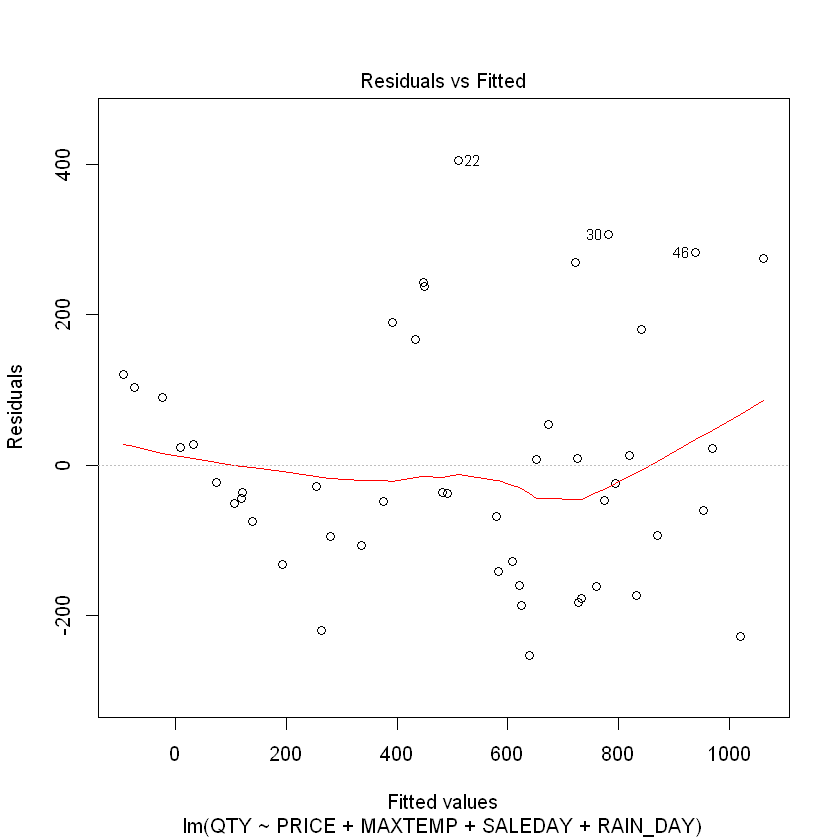

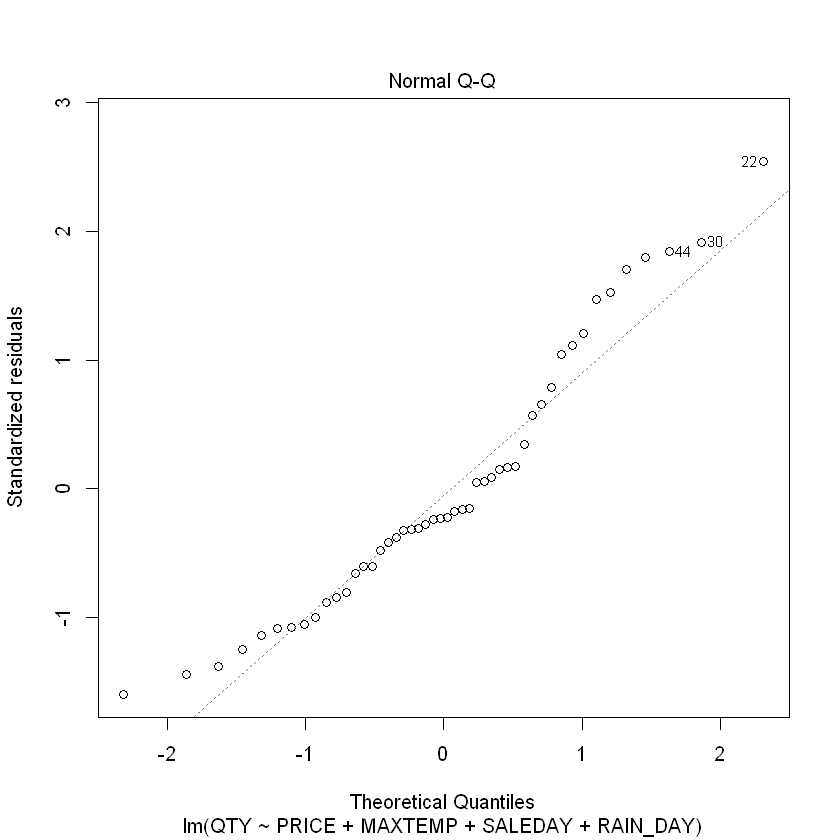

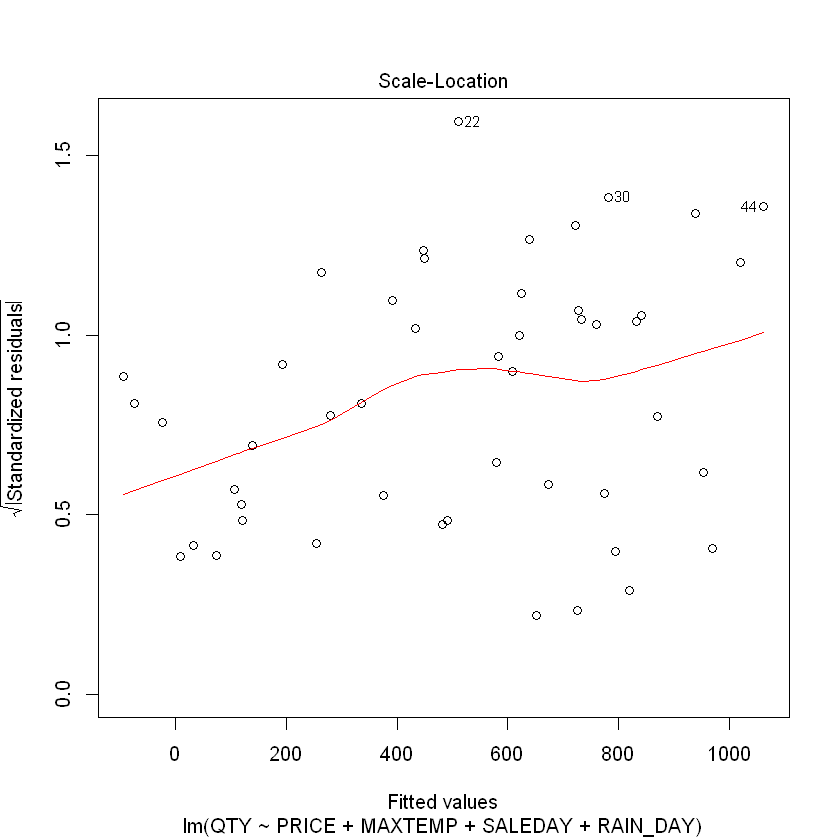

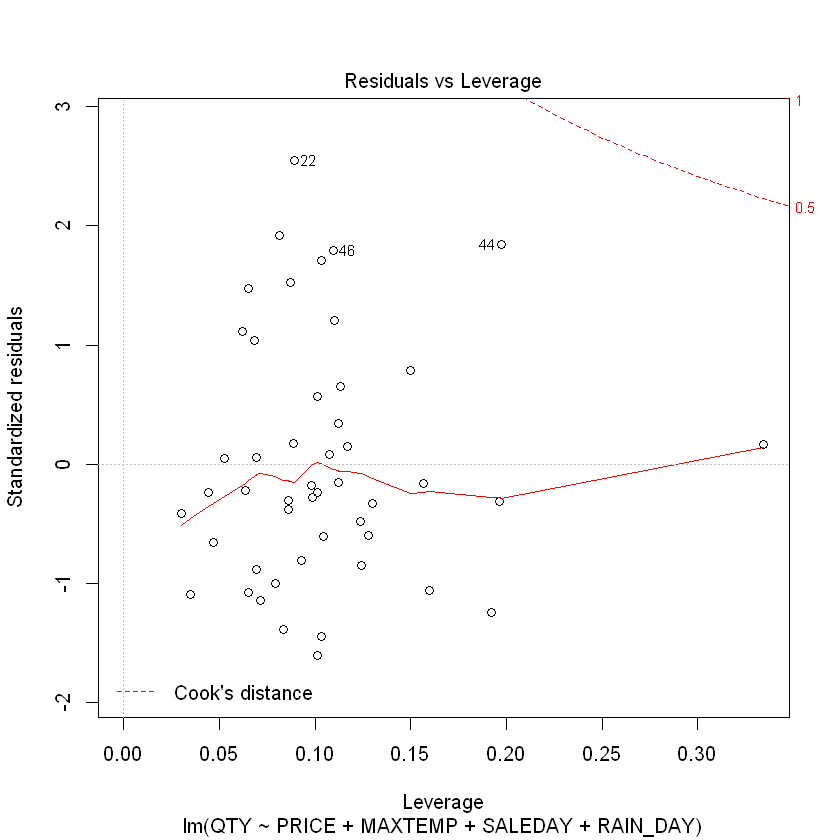

In [15]:
plot(pd2)

In [16]:
pd3 = lm(QTY~PRICE+MAXTEMP+SALEDAY+RAIN_DAY+HOLIDAY, data=product3_train)
summary(pd3)


Call:
lm(formula = QTY ~ PRICE + MAXTEMP + SALEDAY + RAIN_DAY + HOLIDAY, 
    data = product3_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-449.97 -113.80  -23.44   86.58  806.49 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.312e+02  5.083e+02  -1.045   0.3020    
PRICE        1.084e-01  4.081e-01   0.266   0.7918    
MAXTEMP      4.559e+01  4.340e+00  10.505 2.53e-13 ***
SALEDAY      1.115e-02  1.183e-03   9.431 6.26e-12 ***
RAIN_DAY    -7.753e-03  4.372e-03  -1.773   0.0835 .  
HOLIDAY      7.641e+00  2.603e+01   0.294   0.7706    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 208.9 on 42 degrees of freedom
Multiple R-squared:  0.8901,	Adjusted R-squared:  0.8771 
F-statistic: 68.07 on 5 and 42 DF,  p-value: < 2.2e-16


In [17]:
pd3 = lm(QTY~MAXTEMP+SALEDAY+RAIN_DAY, data=product3_train)
summary(pd3)


Call:
lm(formula = QTY ~ MAXTEMP + SALEDAY + RAIN_DAY, data = product3_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-456.47 -124.10  -17.27   79.42  809.74 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.487e+02  1.626e+02  -2.145   0.0375 *  
MAXTEMP      4.547e+01  4.238e+00  10.730 7.28e-14 ***
SALEDAY      1.139e-02  8.799e-04  12.942  < 2e-16 ***
RAIN_DAY    -7.768e-03  4.278e-03  -1.816   0.0762 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 204.5 on 44 degrees of freedom
Multiple R-squared:  0.8897,	Adjusted R-squared:  0.8822 
F-statistic: 118.3 on 3 and 44 DF,  p-value: < 2.2e-16


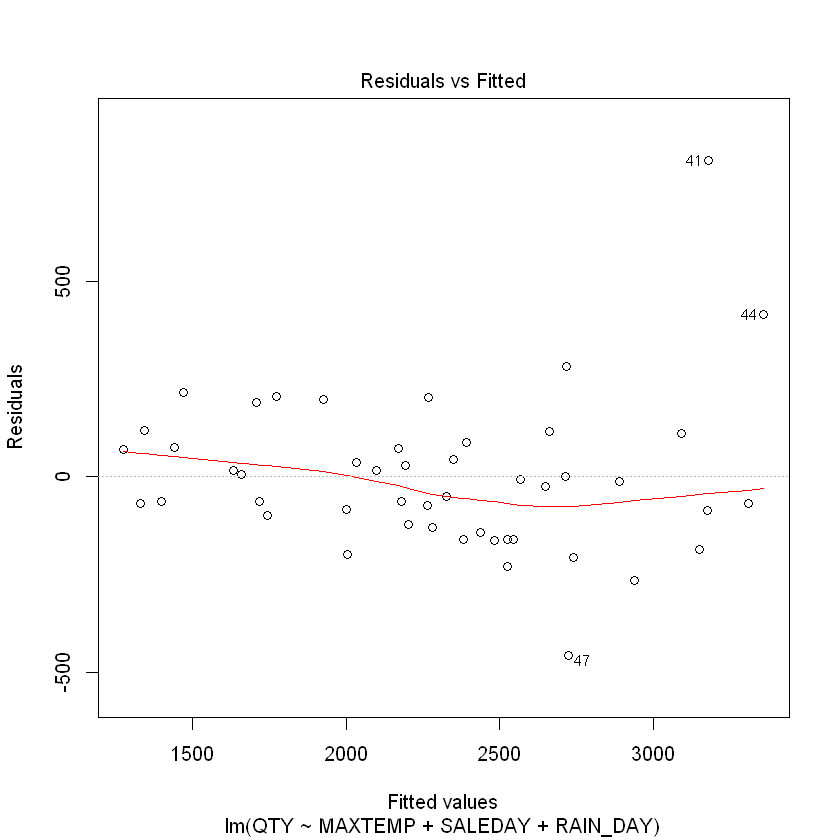

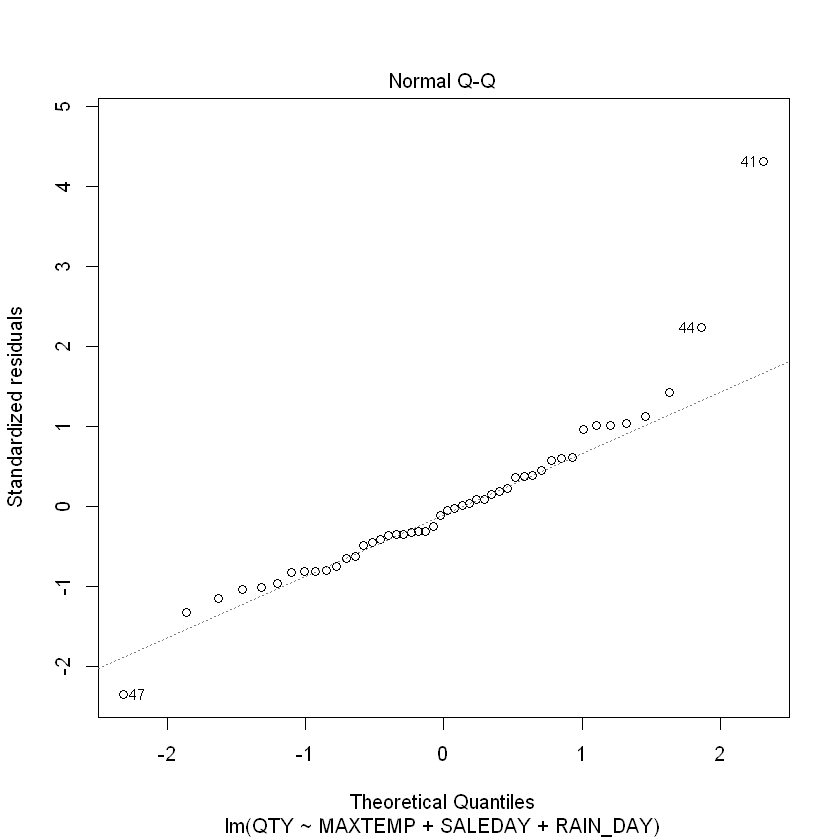

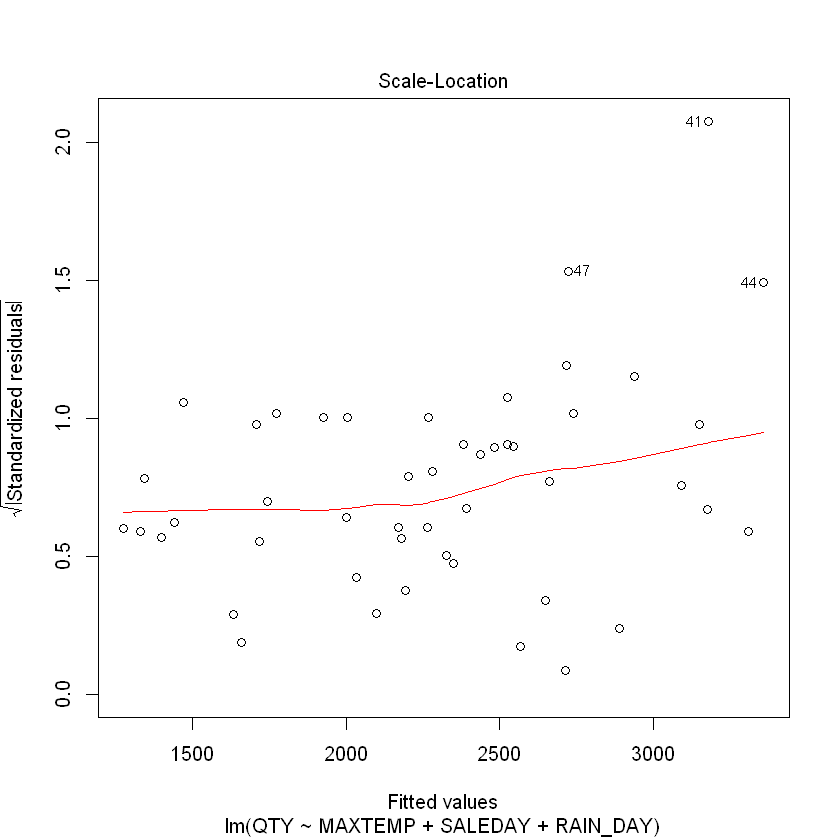

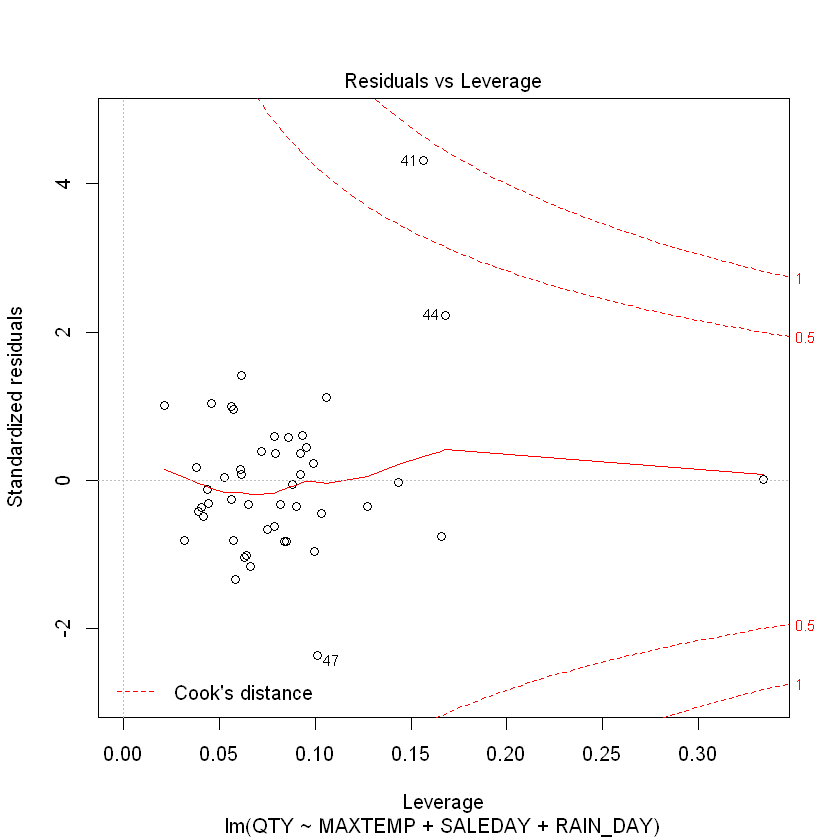

In [18]:
plot(pd3)

In [19]:
pd1.pred = predict(pd1, newdata=product1_test, interval = 'predict')

In [20]:
pd1.pred = as.data.frame(pd1.pred)

In [21]:
pd1.pred = cbind(pd1.pred, product1_test$QTY)

In [22]:
na.omit(pd1.pred)

,fit,lwr,upr,product1_test$QTY
49,1686.183,1105.929,2266.437,1627
50,1672.839,1117.605,2228.073,1624
51,2347.736,1792.110,2903.362,2103
52,2469.521,1921.920,3017.122,2117
53,2918.131,2365.348,3470.913,2606
54,2690.701,2102.931,3278.472,2621
55,2782.335,2188.984,3375.687,2336
56,2875.184,2282.794,3467.573,2755
57,2516.289,1927.010,3105.569,2992
58,2354.293,1760.531,2948.056,2563


In [23]:
pd1.pred$tf[pd1.pred$'product1_test$QTY'>= pd1.pred$lwr & pd1.pred$'product1_test$QTY' <= pd1.pred$upr] = T
pd1.pred$tf[is.na(pd1.pred$tf)] = F

In [24]:
# pd1.pred$tf= ifelse(pd1.pred$'product1_test$QTY'>= pd1.pred$lwr & pd1.pred$'product1_test$QTY' <= pd1.pred$upr, T, F)

In [25]:
pd1.pred = na.omit(pd1.pred)

In [37]:
pd1.pred

,fit,lwr,upr,product1_test$QTY,tf
49,1686.183,1105.929,2266.437,1627,TRUE
50,1672.839,1117.605,2228.073,1624,TRUE
51,2347.736,1792.110,2903.362,2103,TRUE
52,2469.521,1921.920,3017.122,2117,TRUE
53,2918.131,2365.348,3470.913,2606,TRUE
54,2690.701,2102.931,3278.472,2621,TRUE
55,2782.335,2188.984,3375.687,2336,TRUE
56,2875.184,2282.794,3467.573,2755,TRUE
57,2516.289,1927.010,3105.569,2992,TRUE
58,2354.293,1760.531,2948.056,2563,TRUE


In [27]:
sum(pd1.pred$tf == 'TRUE') / dim(pd1.pred)[1]

[1] 1

In [28]:
pd2.pred = predict(pd2, newdata=product1_test, interval = 'predict')
pd2.pred = as.data.frame(pd2.pred)
pd2.pred = cbind(pd2.pred, product2_test$QTY)

In [29]:
pd2.pred$tf= ifelse(pd2.pred$'product2_test$QTY'>= pd2.pred$lwr & pd2.pred$'product2_test$QTY' <= pd2.pred$upr, T, F)

In [30]:
pd2.pred = na.omit(pd2.pred)

In [31]:
sum(pd2.pred$tf == 'TRUE') / dim(pd2.pred)[1]

[1] 0.6666667

In [32]:
pd3.pred = predict(pd3, newdata=product1_test, interval = 'predict')
pd3.pred = as.data.frame(pd3.pred)
pd3.pred = cbind(pd3.pred, product3_test$QTY)
pd3.pred$tf[pd3.pred$'product3_test$QTY'>= pd3.pred$lwr & pd3.pred$'product3_test$QTY' <= pd3.pred$upr] = T
pd3.pred$tf[is.na(pd3.pred$tf)] = F
# pd3.pred$tf= ifelse(pd3.pred$'product3_test$QTY'>= pd3.pred$lwr & pd3.pred$'product3_test$QTY' <= pd3.pred$upr, T, F)

In [33]:
pd3.pred = na.omit(pd3.pred)

In [34]:
sum(pd3.pred$tf == 'TRUE') / dim(pd3.pred)[1]

[1] 0.8333333

In [35]:
# both1 = step(out1, direction = 'both', trace = FALSE)
# both2 = step(out2, direction = 'both', trace = FALSE)
# both3 = step(out3, direction = 'both', trace = FALSE)

In [36]:
summary(out1)

ERROR: Error in summary(out1): 객체 'out1'를 찾을 수 없습니다


In [ ]:
summary(out2)

In [ ]:
summary(out3)

In [ ]:
anova(both1)

In [ ]:
anova(both2)

In [ ]:
anova(both3)

In [ ]:
par(mfrow = c(2,2))
plot(both1)

In [ ]:
par(mfrow = c(2,2))
plot(both2)

In [ ]:
par(mfrow = c(2,2))
plot(both3)

In [ ]:
# pred1 = product1 %>%
#   mutate(pred_QTY = -1854 + X * 18.47 + 16.46 * ITEM_CNT + 0.4013 * PRICE + 52.37 * MAXTEMP - 0.01127 * RAIN_DAY + 46.87 * HOLIDAY )

In [ ]:
a1 = predict(both1, product1, interval = 'predict')
a2 = cbind(a1, product1$QTY)
head(a2)
a2$pre[a2$'product1$QTY' > a2$lwr & a2$'product1$QTY' < a2$upr] = T
# a2$pre[is.na(a2$pre)] = F
# [a1$lwr < a2 && a2 < a1$upr]

In [ ]:
kk = as.data.frame(predict(both2, product2, interval = 'predict'))
cc = product2$QTY
kk = cbind(kk, cc)
kk$acc[kk$'cc' >= kk$lwr & kk$'cc' <= kk$upr] = T
kk$acc[is.na(kk$acc)] = F
head(kk)

In [ ]:
round(sum(kk$acc) / dim(kk)[1], 2)

In [ ]:
predict(both2, product2, interval = 'predict')

In [ ]:
library(forecast)

In [ ]:
a =meanf(product1$QTY, 30)

In [ ]:
summary(a)

In [ ]:
library(autoplot)

In [ ]:
autoplot(product1$QTY, product1$X)